# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from deepchecks.checks.performance import NaiveModelComparison
from deepchecks.base import Dataset

# Generating data:

In [2]:
np.random.seed(42)

iris = load_iris(as_frame=True)
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)
train_ds = Dataset(pd.concat([x_train, y_train], axis=1),
                   features=iris.feature_names,
                   label='target')
val_ds = Dataset(pd.concat([x_test, y_test], axis=1),
                 features=iris.feature_names,
                 label='target')
clf = AdaBoostClassifier()
_ = clf.fit(x_train, y_train)

# Running naive_comparision check:

## Random model check:

In [3]:
check = NaiveModelComparison(naive_model_type='random')

Naive Model Comparison

Compare naive model score to given model score.

The given model performs 4.6 times compared to the naive model using the Accuracy metric. AdaBoostClassifier model prediction has achieved 0.92 compared to Naive random prediction which achieved 0.2 on tested data.

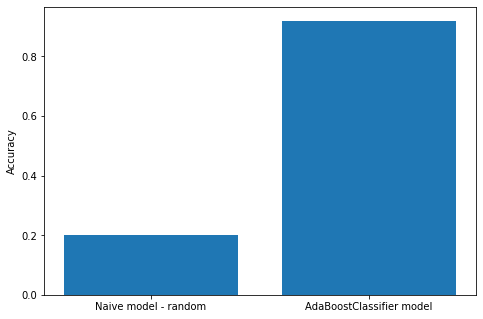

In [4]:
check.run(train_ds, val_ds, clf)

## Tree model check:

In [5]:
check = NaiveModelComparison(naive_model_type='statistical')

Naive Model Comparison

Compare naive model score to given model score.

The given model performs 2.42 times compared to the naive model using the Accuracy metric. AdaBoostClassifier model prediction has achieved 0.92 compared to Naive statistical prediction which achieved 0.38 on tested data.

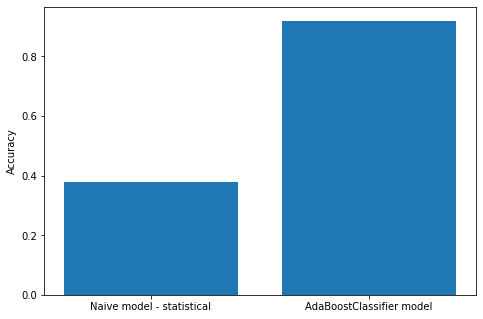

In [6]:
check.run(train_ds, val_ds, clf)